# Torrent Peers Geolocation Finder

## A simple python application to extract peer geolocation from distributed hash tables for bittorrent.

### Bootstrapping DHT

In [ ]:
# Importing the python implementation of bittorrent distributed hash table and bootstrapping it. 
# https://buildmedia.readthedocs.org/media/pdf/btdht/dev/btdht.pdf

import btdht
import binascii
dht = btdht.DHT()
dht.start() 

### Extracting list of peers ip address from infohash list

In [2]:
# Reading the infohash file. The infohash is the SHA1 Hash over the pasrt of a torrent file 
# that includes item, name, piece length, pieces, etc.
# https://stackoverflow.com/questions/28348678/what-exactly-is-the-info-hash-in-a-torrent-file

# The infohash file contains the list of infohash associated with a particular file which one wants to 
# download, say, the installation files for GIMP. The infohash for different versions of GIMP are 
# A4E5201A0D3599E22E09FBC9E02F59DCD575A2D0  
# 70CADD7F66A414DDAEC44F5B28F4FDB0E86B87F8
# 825000684BC3FE6F619705D99B3B2EBDB9214A28
# BC3EDEA2EE1BB6B7806E85F5EB057BFE576C1542
# C691C817F7310AB3E7851576814DFC167BB52740

# This function takes the folder path and file name as inputs. And returns the list of infohash from the file.
# If you take the example of Gimp, then the list five infohash shown above would be returned.


def read_file_infohash(path, filename):
    infohash = []
    read_infohash = open(path+filename,"r")
    for ih in read_infohash:
         infohash.append(ih.strip())
     
    return  infohash

In [3]:
# Extracting the peers from the distributed hash table for each of the hash.

# This function takes the infohash list and returns the ip addresses of all the peers
# obtained by searching the distributed hash table.

import time
def extract_peers_from_network(infohash_list):
    peer_list = []
    for ih in infohash_list:
        dht.get_peers(binascii.a2b_hex(ih))         
        time.sleep(3)   
        dht.get_peers(binascii.a2b_hex(ih))
         
        temp_list = dht.get_peers(binascii.a2b_hex(ih))
        if temp_list != None:
            peer_list.extend(temp_list)
            
        return peer_list

### Associating countries to IP

In [4]:
# The geolite2 database which associates ip addresses to location is used 
# to obtain the list of countries.

# The function takes list of peers (ip addresses) and returns a list of countries.

from geolite2 import geolite2
def findCountriesList(peers_list):
    countries = []
    for peer in peers_list:
         
        (ip,port) = peer
        reader = geolite2.reader()
        a=reader.get(ip)         
         
        if a != None:
            try:
                print(a['country']['names']['en'])
                countries.append(a['country']['names']['en'])
            except KeyError:
                pass
    
    return countries

### Associating IP with cities

In [5]:
# The geolite2 database which associates ip addresses to location is used 
# to obtain the list of cities.

# The function takes list of peers (ip addresses) and returns a list of cities.

def findCitiesList(peers_list):
    cities = []
    for peer in peers_list:
        (ip,port) = peer
        reader = geolite2.reader()
        a=reader.get(ip)         
         
        if a != None:
            #print(a)
            try:
                print(a['city']['names']['en'])
                cities.append(a['city']['names']['en'])
            except KeyError:
                pass
    
    return cities

### Plotting the data - Countries vs #peers

In [15]:
# This function plots the data mined about countries and peers.
# Input: list of countries, name of file (e.g. GIMP) and path to save the file


import pandas as pd
import matplotlib.pyplot as plt
def countries_plot(countries,filename,path):
    l = countries
    df = pd.DataFrame({'freq': l})
    ax=df.groupby('freq', as_index=False).size().plot(kind='bar',figsize=(10, 5))
    ax.xaxis.set_tick_params(labelsize = 8)
    ax.set_xlabel('Countries')
    ax.set_ylabel('#peers')
    plt.title(filename)
    plt.show()
    plt.tight_layout()
    plt.savefig( path + filename+ '-peers-countries.png', dpi=1000)

### Plotting the data - Cities vs #peers

In [16]:
# This function plots the data mined about cities and peers.
# Input: list of cities, name of file (e.g. GIMP) and path to save the file


import pandas as pd
import matplotlib.pyplot as plt
def cities_plot(cities,filename,path):
    l = cities
    df = pd.DataFrame({'freq': l})
    ax=df.groupby('freq', as_index=False).size().plot(kind='bar',figsize=(14, 5))
    ax.xaxis.set_tick_params(labelsize = 8)
    ax.set_xlabel('Cities')
    ax.set_ylabel('#peers)')
    plt.title(filename)
    plt.show()
    plt.tight_layout()
    plt.savefig( path + filename+ '-peers-cities.png', dpi=1000)

# Example

In [10]:
## This example illustrates the working for the Gimp torrent. The infohash file is gimp-infohash.txt
## path is the path to this file. Note that the plots will be saved at the same path.
## filename is GIMP. It is used as title for the plots.

path = "C:\\Users\\deepa\\Desktop\\Dyaus\\torrent-analytics\\example\\"    
infohash_filename = 'gimp_infohash.txt'
filename = 'GIMP'

In [17]:
infohash = read_file_infohash(path, infohash_filename)

# For exhaustively extracting peers from DHT, one must call the function mutiple times.
for i in range(0,10):
    peers_list = extract_peers_from_network(infohash)

# Generating the list of countries and cities from peers (ip addresses)   
countries = findCountriesList(peers_list) 
cities = findCitiesList(peers_list)


Uruguay
South Africa
India
Vietnam
United States
Sri Lanka
Sri Lanka
United States
Uruguay
Algeria
Brazil
United States
United States
France
Russia
Germany
Ukraine
Namibia
United States
Montevideo
Port Elizabeth
Chennai
Hanoi
Ridgefield Park
Colombo
Colombo
Narberth
Montevideo
Commune de Draa Ben Khedda
Casinhas
Little Chute
Rowley
Charenton-le-Pont
Paderborn
Kiev
Oshakati
Ashburn


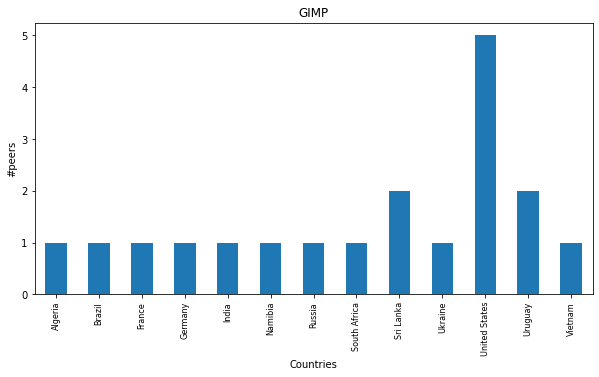

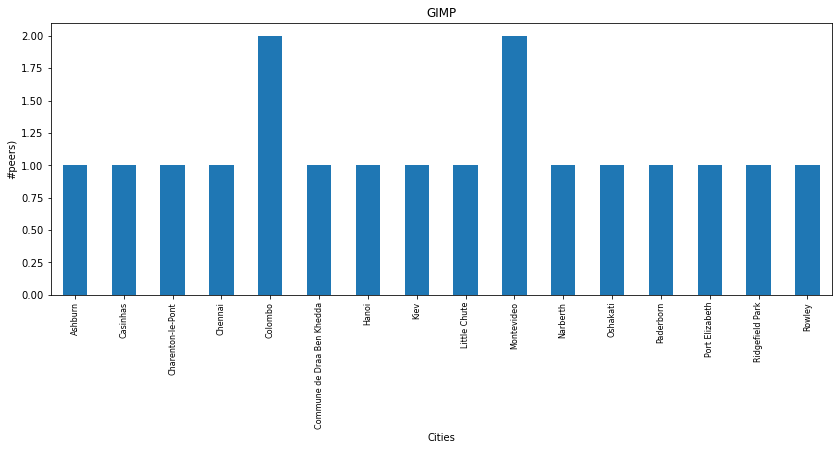

<Figure size 432x288 with 0 Axes>

In [18]:
## Generating the plots

countries_plot(countries,filename,path)
cities_plot(cities,filename,path)
